In [1]:
# [RDKitで立体的な分子の形を記述する | 化学の新しいカタチ](https://future-chem.com/rdkit-3ddescriptor/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Descriptors, Descriptors3D, rdMolDescriptors, Draw

RDKit WARNING: [08:36:03] Enabling RDKit 2019.09.2 jupyter extensions


In [3]:
# read molecule
suppl = Chem.SDMolSupplier('./sdf/platinum_dataset_2017_01.sdf')
mols = [x for x in suppl if x is not None]
len(mols)

4548

In [4]:
flat = [Descriptors.FractionCSP3(mol) for mol in mols]
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
pd.value_counts(pd.cut(flat, bins), sort=False)

(0.0, 0.2]    1064
(0.2, 0.4]    1420
(0.4, 0.6]     969
(0.6, 0.8]     362
(0.8, 1.0]     341
dtype: int64

In [5]:
print(mols[0])
benzene = Chem.MolFromSmiles('c1ccccc1')
print(benzene)
print(AllChem.AddHs(benzene))
print(AllChem.EmbedMolecule(AllChem.AddHs(benzene)))
# Descriptors3D.NPR1(mols[0])
# Descriptors3D.NPR1(benzene)
# Descriptors3D.NPR1(AllChem.AddHs(benzene))

# Draw.MolToImage(benzene)
# Draw.MolToImage(mols[500])

0


(0.5, 1.005)

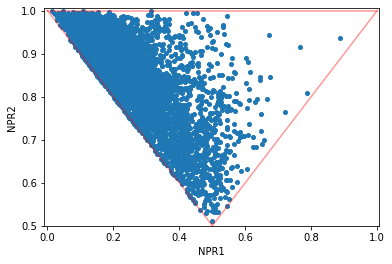

In [6]:
# PMI plot
x = []
y = []
for m in mols:
    x.append(Descriptors3D.NPR1(m))
    y.append(Descriptors3D.NPR2(m))
xx = np.linspace(0, 1, 100)
plt.plot(x, y, 'o', ms=4)
# plt.plot(ben_x, ben_y, 'ks', ms=10)
# plt.plot(adam_x, adam_y, 'ks', ms=10)
# plt.plot(alkyne_x, alkyne_y, 'ks', ms=10)
plt.plot(xx, 1-xx, 'r', alpha=0.4)
plt.plot(xx, np.ones(100), 'r', alpha=0.4)
plt.plot(xx, xx, 'r', alpha=0.4)
plt.xlabel('NPR1')
plt.ylabel('NPR2')
plt.xlim(-0.01, 1.005)
plt.ylim(0.5, 1.005)

In [10]:
xx[10]

0.10101010101010102

(0.5, 1)

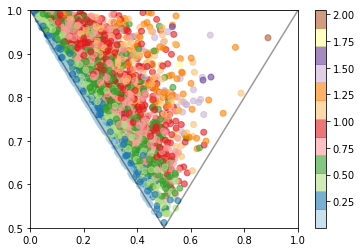

In [16]:
pbf = []
for mol in mols:
    pbf.append(rdMolDescriptors.CalcPBF(mol))
s2 = pd.Series(pbf)
s2.describe().round(2)

plt.scatter(x, y, vmin=min(pbf), vmax=max(pbf), c=pbf, cmap='Paired', alpha=0.6)
plt.plot(xx, 1-xx, 'k', alpha=0.4)
plt.plot(xx, np.ones(100), 'k', alpha=0.4)
plt.plot(xx, xx, 'k', alpha=0.4)
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0.5,1)